1. IMPLEMENTACIÓN DE LIBRERIAS

In [ ]:
!pip install automata-lib==1.0.0.post4

  Preparing metadata (setup.py) ... done
  Created wheel for automata-lib: filename=automata_lib-1.0.0.post4-py3-none-any.whl size=13297 sha256=a21b266963b7f505a62eba527f1f8a2c01deaf6dacc7fa2dd0d13b94fdd166d3
  Stored in directory: /root/.cache/pip/wheels/26/71/b2/d25f8716fe6ce04034bc2ab2808a511f44109b4307404350eb
Successfully built automata-lib


In [ ]:
from IPython.display import Image, display

2. PROGRAMACIÓN DEL AUTOMATA SIMULANDO UN BOT DE TRADING

In [ ]:
import random

class TradingBot:
    def __init__(self):
        self.states = ['Mantenerse', 'Comprar', 'Vender']
        self.input_symbols = ['Sube', 'Baja', 'Fluctua']
        self.transitions = {
            'Mantenerse': {'Sube': 'Vender', 'Baja': 'Comprar', 'Fluctua': 'Mantenerse'},
            'Comprar': {'Sube': 'Mantenerse', 'Baja': 'Vender', 'Fluctua': 'Mantenerse'},
            'Vender': {'Sube': 'Comprar', 'Baja': 'Mantenerse', 'Fluctua': 'Mantenerse'},
        }

        self.initial_state = 'Mantenerse'
        self.final_states = ['Mantenerse']
        self.MinGanancia = 50  # Ganancia mínima aleatoria
        self.MaxGanancia  = 1000  # Ganancia máxima aleatoria
        self.MinPerdida = 50  # Pérdida mínima aleatoria
        self.MaxPerdida = 500  # Pérdida máxima aleatoria

    def run(self, input_sequence, BalanceInicial):
        current_state = self.initial_state
        Decisiones = []
        balance = BalanceInicial
        TotalGanancia = 0
        TotalPerdida = 0

        for symbol in input_sequence:
            if symbol not in self.input_symbols:
                raise ValueError('Invalid input symbol:', symbol)

            next_state = self.transitions[current_state][symbol]

            if current_state != next_state:
                decision = f'Decisión: {current_state} -> {next_state}'
                Decisiones.append(decision)

            current_state = next_state

            if current_state == 'Comprar':
                Perdida = random.randint(self.MinPerdida, self.MaxPerdida )
                balance -= Perdida
                Decisiones.append(f'Cambio de saldo: -{Perdida}'+"\n")
                TotalPerdida += Perdida

            elif current_state == 'Vender':
                Ganancia = random.randint(self.MinGanancia, self.MaxGanancia)
                balance += Ganancia
                Decisiones.append(f'Cambio de saldo: +{Ganancia}'+"\n")
                TotalGanancia += Ganancia

        Decisiones.append(f'Saldo final: {balance}')

        if balance < initial_balance / 2:
            Decisiones.append('El saldo ha bajado más de la mitad del saldo inicial. Deteniendo el bot.')

        return current_state, balance, Decisiones


3. DIAGRAMA CORRESPONDIENTE AL AUTOMATA.



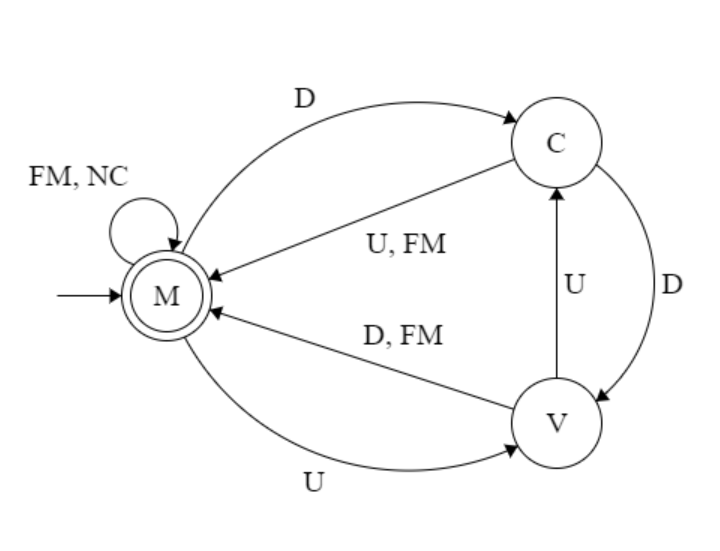

In [ ]:
display(Image('files/trading.png'))

4. PRUEBA DE AUTOMATA.

In [ ]:
try:
    initial_balance = float(input('Ingresa el saldo inicial: '))
except ValueError:
    print('Error: El saldo inicial debe ser un número.')
    exit()

# Generar una lista aleatoria de palabras para el bot de trading, incluyendo "NoChange" para mayor complejidad
input_sequence = [random.choice(['Sube', 'Baja', 'Fluctua']) for _ in range(20)]

# Ejecutar el bot de trading con la lista de palabras aleatoria

bot = TradingBot()
final_state, balance, decisions = bot.run(input_sequence, initial_balance)

print("\n"+'Saldo final:', balance)
print("\n"+'Decisiones tomadas:')
for decision in decisions:
    print(decision)

Ingresa el saldo inicial: 4000

Saldo final: 5668.0

Decisiones tomadas:
Decisión: Mantenerse -> Comprar
Cambio de saldo: -144

Decisión: Comprar -> Vender
Cambio de saldo: +609

Decisión: Vender -> Mantenerse
Decisión: Mantenerse -> Vender
Cambio de saldo: +695

Decisión: Vender -> Comprar
Cambio de saldo: -387

Decisión: Comprar -> Vender
Cambio de saldo: +764

Decisión: Vender -> Mantenerse
Decisión: Mantenerse -> Comprar
Cambio de saldo: -437

Decisión: Comprar -> Vender
Cambio de saldo: +323

Decisión: Vender -> Comprar
Cambio de saldo: -490

Decisión: Comprar -> Mantenerse
Decisión: Mantenerse -> Vender
Cambio de saldo: +868

Decisión: Vender -> Mantenerse
Decisión: Mantenerse -> Comprar
Cambio de saldo: -181

Decisión: Comprar -> Mantenerse
Decisión: Mantenerse -> Comprar
Cambio de saldo: -430

Decisión: Comprar -> Vender
Cambio de saldo: +478

Decisión: Vender -> Mantenerse
Saldo final: 5668.0
